In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("pushup1.csv")
df.head()

,timestamp,gravityX,gravityY,gravityZ,accelX,accelY,accelZ,rotX,rotY,rotZ,roll,pitch,yaw
0,1579037306394,0.894977,0.150202,-0.420066,-0.000492,-0.008707,-0.000985,-0.143846,0.049154,0.054141,1.131960,-0.150773,0.095896
1,1579037306467,0.895494,0.150864,-0.418725,0.003676,-0.021073,0.005441,-0.114004,0.057769,-0.000697,1.133410,-0.151443,0.098394
2,1579037306476,0.895882,0.151975,-0.417490,0.003898,0.000857,0.011591,-0.101862,0.048487,-0.018732,1.134709,-0.152567,0.100095
3,1579037306483,0.896110,0.153049,-0.416607,0.007775,0.021405,0.006360,-0.102851,0.025119,-0.008585,1.135616,-0.153653,0.101825
4,1579037306488,0.896388,0.153539,-0.415828,0.004140,0.014002,0.007045,-0.090782,0.028186,0.029101,1.136449,-0.154149,0.103539


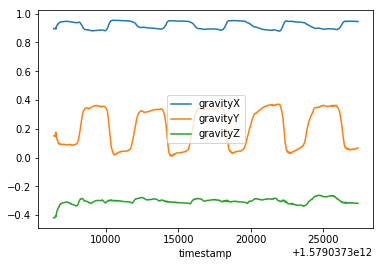

In [3]:
df[["timestamp", "gravityX", "gravityY", "gravityZ"]].plot(x="timestamp")

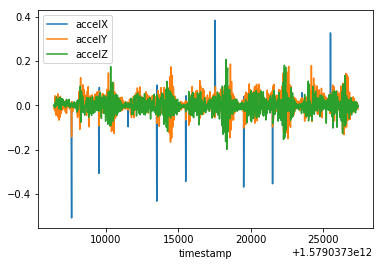

In [4]:
df[["timestamp", "accelX", "accelY", "accelZ"]].plot(x="timestamp")

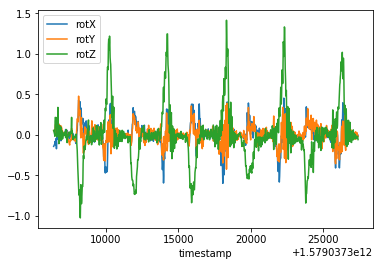

In [5]:
df[["timestamp", "rotX", "rotY", "rotZ"]].plot(x="timestamp")

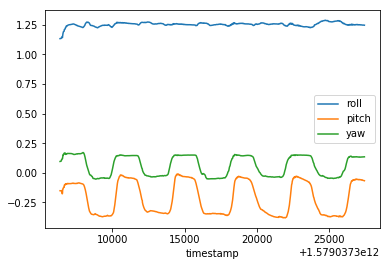

In [6]:
df[["timestamp", "roll", "pitch", "yaw"]].plot(x="timestamp")

In [7]:
labels = pd.read_json("pushup1.json", orient='records', convert_dates=False)
labels.head()

,state,timestamp
0,Workout_Tracker_WatchKit_Extension.State.down,1579037307492
1,Workout_Tracker_WatchKit_Extension.State.up,1579037309434
2,Workout_Tracker_WatchKit_Extension.State.down,1579037311436
3,Workout_Tracker_WatchKit_Extension.State.up,1579037313434
4,Workout_Tracker_WatchKit_Extension.State.down,1579037315434


In [11]:
def map_data_to_label(labels, timestamp):
    label = None
    for row in labels.itertuples():
        if timestamp < row.timestamp:
            return label
        label = row.state
    return label

df["activity"] = df["timestamp"].apply(lambda x: map_data_to_label(labels, x))
df.count()

timestamp    1110
gravityX     1110
gravityY     1110
gravityZ     1110
accelX       1110
accelY       1110
accelZ       1110
rotX         1110
rotY         1110
rotZ         1110
roll         1110
pitch        1110
yaw          1110
activity     1028
dtype: int64

In [12]:
df.to_csv("pushups1_labeled.csv")